Integral from 0 to 3 is: 0.8862073362266246


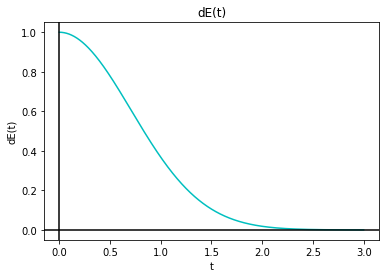

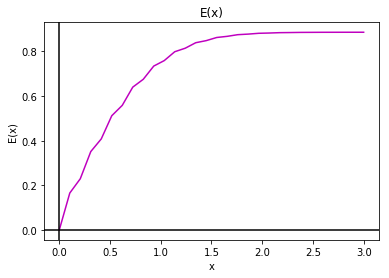

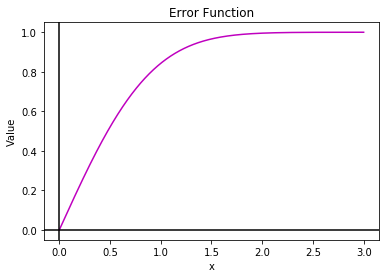

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Exercise 5.3 in Newman. In addition, use the NumPy 
#implementation of the error function erf (which this is
#very close to) to check your answer. Note that the NumPy 
#(and other library’s) implementation of erf uses a very
#accurate fitting formula, not an explicit integration, which
#makes it very fast.

def dE(t):
    return (math.e)**(-t**2)
    
array1=np.zeros(1000)

a_0=0
a_f=3
Sharpness=30

xvalues=np.linspace(a_0,a_f,1000)

sum1=0
sum2=0

for i in range(len(array1)):
    array1[i]=dE(xvalues[i])

width=(a_f-a_0)/Sharpness
x=np.zeros(Sharpness)

for i in range(1,Sharpness):
    if(i%2==1 or i==1):
        sum1+=dE(a_0+i*width)
    elif(i%2==0):
        sum2+=dE(a_0+i*width)
    x[i]=(width/3)*(dE(a_0)+dE(a_f)+(4*sum1)+(2*sum2))
#    print(x[i])

print("Integral from 0 to 3 is:",(width/3)*(dE(a_0)+dE(a_f)+(4*sum1)+(2*sum2)))
        
plt.plot(xvalues,array1,'c-')
plt.title("dE(t)")
plt.xlabel("t")
plt.ylabel("dE(t)")
plt.axhline(color="black")
plt.axvline(color="black")
plt.show()

plt.plot(np.linspace(a_0,a_f,len(x)),x,'m-')
plt.title("E(x)")
plt.xlabel("x")
plt.ylabel("E(x)")
plt.axhline(color="black")
plt.axvline(color="black")
plt.show()

ErrorFunc=np.zeros(len(xvalues))
for i in range(len(xvalues)):
    ErrorFunc[i]=math.erf(xvalues[i])

plt.plot(xvalues,ErrorFunc,'m-')
plt.title("Error Function")
plt.xlabel("x")
plt.ylabel("Value")
plt.axhline(color="black")
plt.axvline(color="black")
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


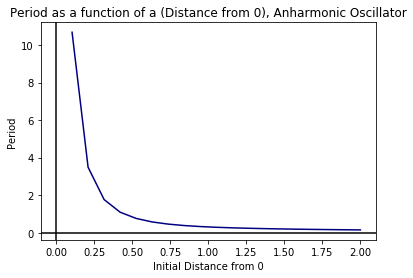

In [21]:
#5.10 - Period of an anharmonic oscillator

import numpy as np
import math
import matplotlib.pyplot as plt

#Gaussian Quadrature function from University of Michican site:

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(math.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

N = 20
m = 1

def V(x):
    return x**4

x,w = gaussxw(N)

def T(point):
    xp = 0.5*(point)*x + 0.5*(point)
    wp = 0.5*(point)*w
    E = V(point)
    s=sum(wp/math.sqrt(E-V(xp[point])))
    return s*math.sqrt(8*m)

a = np.linspace(0,2,N)
Anharmonic_periods = np.zeros(N)

for i in range(len(a)):
    Anharmonic_periods[i]=T(i)

plt.plot(a,Anharmonic_periods, "navy")
plt.title("Period as a function of a (Distance from 0), Anharmonic Oscillator")
plt.xlabel("Initial Distance from 0")
plt.ylabel("Period")
plt.axhline(color="k")
plt.axvline(color="k")
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


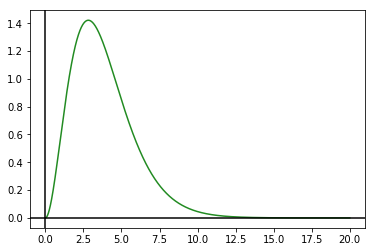

Integral from 0 to 100: 6.493939402433493
Stefan Boltzmann Constant,'σ': 5.65e-08


In [20]:
#5.12 Boltzmann Constant

import numpy as np
import math
import matplotlib.pyplot as plt

k_B=1.38*(10**-23)
Adj_Planck=1.0546*(10**-34)
c=3*(10**8)

Stefan_Boltzmann_sigma=(k_B**4)/((4*math.pi**2)*(c**2)*(Adj_Planck**3))

x_w=np.linspace(0,20,10000)
W_y=np.zeros(len(x_w))

a=1*10**-10
#b=max(x_w)
b=100
h=(b-a)/len(x_w)

def W(x):
    return (x**3)/((math.e**x)-1)

for i in range(len(x_w)):
    W_y[i]=W(x_w[i])

plt.plot(x_w,W_y,'forestgreen')
plt.axhline(color="k")
plt.axvline(color="k")
plt.show()

# Simpson's Rule:

base=W(a)+W(b)

sum1=0
sum2=0

for i in range(1,len(x_w)):
    if(i%2==1 or i==1):
        sum1+=W(a+i*h)
    elif(i%2==0):
        sum2+=W(a+i*h)
        
Stefan_Constant_multiplier=(h/3)*(base+(4*sum1)+(2*sum2))

print("Integral from 0 to 100:",(h/3)*(base+(4*sum1)+(2*sum2)))   
print("Stefan Boltzmann Constant,'σ':",np.around(Stefan_Boltzmann_sigma*Stefan_Constant_multiplier,10))